# Numerical Integration with Genz Functions

In [1]:
from PyUQTk.utils.func import *
from quad_tools import *

import matplotlib.pyplot as plt
import numpy as np

PyMC is required for some of the MCMC postprocessing codes.
Will proceed without, but some convergence tests will not be available.


## Inputs

In [2]:
model = 'genz_osc' # which Genz function to use
ndim = 3           # Number of dimensions
q_pts = 40         # Maximum number of quad points per dimension

We will consider varying numbers of quadrature points per dimension, from 1 to the maximum number, q_pts. Then, we calculate the total quadrature points, tot_pts, used for each function evaluation.

In [3]:
num_points=range(1,q_pts+1)
tot_pts=[i**ndim for i in num_points]

## Quadrature Integration

We loop through differnt values for the number of quad points per dimension. For each, we calculate the integral of the chosen Genz function, the quadrature integration value, and the error between the two.

In [5]:
q_errors=[] #list to store quad errors
func_params=ones(ndim+1) #Genz parameters

#Loop though different values for number of quad points per dimension
for quad_param in num_points:
    
    #Generate quadrature points
    xpts,wghts=generate_qw(ndim,quad_param)

    #Evaluate the function at the quad points
    ypts=func(xpts,model,func_params)
    
    #Quadrature integration
    integ=dot(ypts,wghts)
    
    #Evaluate the exact integral
    integ_ex=integ_exact(model,func_params)
    
    #Calculate error in quad integration and add to list
    q_error=abs(integ-integ_ex)
    q_errors.append(q_error)

## Monte Carlo Integration
We calculate average error in 10 Monte Carlo integrations for varying numbers of sampling points.

In [6]:
mc_errors=[]

for pts in tot_pts:
    error=find_error(pts,ndim,model,integ_ex, func_params)
    mc_errors.append(error)

## Create Graph

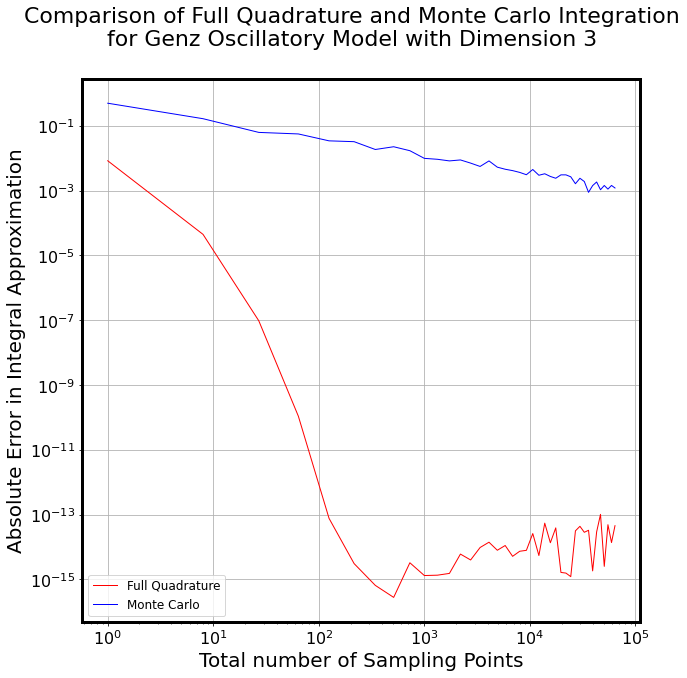

In [7]:
#Create figure
fig, ax = plt.subplots(figsize=(10,10))
#Plot Quadrature Data
plt.plot(tot_pts, q_errors, color='r', label='Full Quadrature')
#Plot Monte Carlo Data
plt.plot(mc_pts, mc_errors, color='b', label='Monte Carlo')
#Label Axes
plt.xlabel("Total number of Sampling Points",fontsize=20)
plt.ylabel("Absolute Error in Integral Approximation",fontsize=20)
#Create legend
plt.legend(loc='lower left')

#Model titles to be displayed
if model=="genz_osc":
    model_title="Genz Oscillatory"
elif model=="genz_gaus":
    model_title="Genz Gaussian"
elif model=="genz_ppeak":
    model_title="Genz Product-Peak"
elif model=="genz_cpeak":
    model_title="Genz Corner-Peak"
elif model=="genz_exp":
    model_title="Genz Exponential"
else:
    model_title="Genz Continuous"

#Add title
fig.suptitle("Comparison of Full Quadrature and Monte Carlo Integration\nfor %s Model with\
 Dimension %s"%(model_title, str(ndim)), fontsize=22)
#Make scales logarithmic
plt.yscale('log')
plt.xscale('log')
#Change size of tick labels
plt.tick_params(axis='both', labelsize=16)

#Save figure
fig_file_name="quad_vs_mc.pdf"
plt.savefig(fig_file_name)

#Show figure
plt.show() 